In [4]:
from IPython.display import display, Math, Latex



AdaNet: Adaptive Structural Learning of Neural Networks [Cortes et al., ICML 2017] defines an algorithm that aims to directly minimize the DeepBoost generalization bound from Deep Boosting [Cortes et al., ICML 2014] whenapplied to neural networks. This algorithm, called AdaNet, adaptively grows a neural network as an ensemble ofsubnetworks that minimizes the AdaNet objective (a.k.a. AdaNet loss):

$$F(w) = \frac{1}{m} \sum_{i=1}^{m} \Phi \left(\sum_{j=1}^{N}w_jh_j(x_i), y_i \right) + \sum_{j=1}^{N} \left(\lambda r(h_j) + \beta \right) |w_j| $$

where $w$ is the set of mixture weights, one per subnetwork $h$, $\Phi$ is a surrogate loss function such as logistic loss or MSE, $r$ is a function for measuring a subnetwork's complexity, and $\lambda$ and $\beta$ are hyperparameters.


How AdaNet uses the objective

This objective function serves two purposes:
To learn to scale/transform the outputs of each subnetwork $h$ as part of the ensemble.
To select the best candidate subnetwork $h$ at each AdaNet iteration to include in the ensemble.
Effectively, when learning mixture weights $w$ AdaNet solves a convex combination of the outputs of the frozen subnetworks $h$. For $$\lambda \gt 0,$$ AdaNet penalizes more complex subnetworks with greater L1 regularization on their mixture weight, and will be less 
likely to select more complex subnetworks to add to the ensemble at each iteration.


We will solve a regression task known as the Boston Housing dataset to predict the price of suburban houses in Boston. There are $13$ numerical features, the labels are in thousands of dollars, and there are only 506 examples.



ERROR:root:Line magic function `%capture` not found (But cell magic `%%capture` exists, did you mean that instead?).


INFO:tensorflow:Using config: {'_model_dir': '/var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmpjlwrlgum', '_tf_random_seed': 42, '_save_summary_steps': 50000, '_save_checkpoints_steps': 50000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x13120c128>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmpjlwrlgum', '_tf_random_seed': 42, '_save_summary_steps': 50000, '_save_checkpoints_steps': 50000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x13120c128>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Not using Distribute Coordinator.


INFO:tensorflow:Not using Distribute Coordinator.


INFO:tensorflow:Running training and evaluation locally (non-distributed).


INFO:tensorflow:Running training and evaluation locally (non-distributed).


INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after every checkpoint. Checkpoint frequency is determined based on RunConfig arguments: save_checkpoints_steps 50000 or save_checkpoints_secs None.


INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after every checkpoint. Checkpoint frequency is determined based on RunConfig arguments: save_checkpoints_steps 50000 or save_checkpoints_secs None.


INFO:tensorflow:Beginning training AdaNet iteration 0


INFO:tensorflow:Beginning training AdaNet iteration 0


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmpjlwrlgum/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmpjlwrlgum/model.ckpt.


INFO:tensorflow:loss = 21.773132, step = 1


INFO:tensorflow:loss = 21.773132, step = 1


INFO:tensorflow:global_step/sec: 300.56


INFO:tensorflow:global_step/sec: 300.56


INFO:tensorflow:loss = 0.647101, step = 101 (0.334 sec)


INFO:tensorflow:loss = 0.647101, step = 101 (0.334 sec)


INFO:tensorflow:global_step/sec: 860.978


INFO:tensorflow:global_step/sec: 860.978


INFO:tensorflow:loss = 0.58654255, step = 201 (0.116 sec)


INFO:tensorflow:loss = 0.58654255, step = 201 (0.116 sec)


INFO:tensorflow:global_step/sec: 860.852


INFO:tensorflow:global_step/sec: 860.852


INFO:tensorflow:loss = 0.07683477, step = 301 (0.116 sec)


INFO:tensorflow:loss = 0.07683477, step = 301 (0.116 sec)


INFO:tensorflow:global_step/sec: 840.958


INFO:tensorflow:global_step/sec: 840.958


INFO:tensorflow:loss = 0.08281773, step = 401 (0.119 sec)


INFO:tensorflow:loss = 0.08281773, step = 401 (0.119 sec)


INFO:tensorflow:global_step/sec: 858.885


INFO:tensorflow:global_step/sec: 858.885


INFO:tensorflow:loss = 0.08148783, step = 501 (0.116 sec)


INFO:tensorflow:loss = 0.08148783, step = 501 (0.116 sec)


INFO:tensorflow:global_step/sec: 861.639


INFO:tensorflow:global_step/sec: 861.639


INFO:tensorflow:loss = 0.056522056, step = 601 (0.116 sec)


INFO:tensorflow:loss = 0.056522056, step = 601 (0.116 sec)


INFO:tensorflow:global_step/sec: 862.901


INFO:tensorflow:global_step/sec: 862.901


INFO:tensorflow:loss = 0.025881834, step = 701 (0.116 sec)


INFO:tensorflow:loss = 0.025881834, step = 701 (0.116 sec)


INFO:tensorflow:global_step/sec: 830.379


INFO:tensorflow:global_step/sec: 830.379


INFO:tensorflow:loss = 0.030095303, step = 801 (0.120 sec)


INFO:tensorflow:loss = 0.030095303, step = 801 (0.120 sec)


INFO:tensorflow:global_step/sec: 852.747


INFO:tensorflow:global_step/sec: 852.747


INFO:tensorflow:loss = 0.03755439, step = 901 (0.118 sec)


INFO:tensorflow:loss = 0.03755439, step = 901 (0.118 sec)


INFO:tensorflow:Saving checkpoints for 1000 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmpjlwrlgum/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1000 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmpjlwrlgum/model.ckpt.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2018-11-11-20:30:25


INFO:tensorflow:Starting evaluation at 2018-11-11-20:30:25


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmpjlwrlgum/model.ckpt-1000


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmpjlwrlgum/model.ckpt-1000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving candidate 'linear' dict for global step 1000: architecture/adanet/ensembles = b"\nW\n6adanet/iteration_0/ensemble_linear/architecture/adanetB\x13\x08\x07\x12\x00B\r| b'linear' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.07343755, average_loss/adanet/subnetwork = 0.07343755, average_loss/adanet/uniform_average_ensemble = 0.07343755, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.08226409, loss/adanet/subnetwork = 0.08226409, loss/adanet/uniform_average_ensemble = 0.08226409, prediction/mean/adanet/adanet_weighted_ensemble = 3.1694195, prediction/mean/adanet/subnetwork = 3.1694195, prediction/mean/adanet/uniform_average_ensemble = 3.1694195


INFO:tensorflow:Saving candidate 'linear' dict for global step 1000: architecture/adanet/ensembles = b"\nW\n6adanet/iteration_0/ensemble_linear/architecture/adanetB\x13\x08\x07\x12\x00B\r| b'linear' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.07343755, average_loss/adanet/subnetwork = 0.07343755, average_loss/adanet/uniform_average_ensemble = 0.07343755, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.08226409, loss/adanet/subnetwork = 0.08226409, loss/adanet/uniform_average_ensemble = 0.08226409, prediction/mean/adanet/adanet_weighted_ensemble = 3.1694195, prediction/mean/adanet/subnetwork = 3.1694195, prediction/mean/adanet/uniform_average_ensemble = 3.1694195


INFO:tensorflow:Saving candidate '1_layer_dnn' dict for global step 1000: architecture/adanet/ensembles = b"\na\n;adanet/iteration_0/ensemble_1_layer_dnn/architecture/adanetB\x18\x08\x07\x12\x00B\x12| b'1_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.07330291, average_loss/adanet/subnetwork = 0.07330291, average_loss/adanet/uniform_average_ensemble = 0.07330291, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.087380424, loss/adanet/subnetwork = 0.087380424, loss/adanet/uniform_average_ensemble = 0.087380424, prediction/mean/adanet/adanet_weighted_ensemble = 3.2274292, prediction/mean/adanet/subnetwork = 3.2274292, prediction/mean/adanet/uniform_average_ensemble = 3.2274292


INFO:tensorflow:Saving candidate '1_layer_dnn' dict for global step 1000: architecture/adanet/ensembles = b"\na\n;adanet/iteration_0/ensemble_1_layer_dnn/architecture/adanetB\x18\x08\x07\x12\x00B\x12| b'1_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.07330291, average_loss/adanet/subnetwork = 0.07330291, average_loss/adanet/uniform_average_ensemble = 0.07330291, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.087380424, loss/adanet/subnetwork = 0.087380424, loss/adanet/uniform_average_ensemble = 0.087380424, prediction/mean/adanet/adanet_weighted_ensemble = 3.2274292, prediction/mean/adanet/subnetwork = 3.2274292, prediction/mean/adanet/uniform_average_ensemble = 3.2274292


INFO:tensorflow:Finished evaluation at 2018-11-11-20:30:27


INFO:tensorflow:Finished evaluation at 2018-11-11-20:30:27


INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.07330291, average_loss/adanet/adanet_weighted_ensemble = 0.07330291, average_loss/adanet/subnetwork = 0.07330291, average_loss/adanet/uniform_average_ensemble = 0.07330291, global_step = 1000, label/mean = 3.1049454, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss = 0.087380424, loss/adanet/adanet_weighted_ensemble = 0.087380424, loss/adanet/subnetwork = 0.087380424, loss/adanet/uniform_average_ensemble = 0.087380424, prediction/mean = 3.2274292, prediction/mean/adanet/adanet_weighted_ensemble = 3.2274292, prediction/mean/adanet/subnetwork = 3.2274292, prediction/mean/adanet/uniform_average_ensemble = 3.2274292


INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.07330291, average_loss/adanet/adanet_weighted_ensemble = 0.07330291, average_loss/adanet/subnetwork = 0.07330291, average_loss/adanet/uniform_average_ensemble = 0.07330291, global_step = 1000, label/mean = 3.1049454, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss = 0.087380424, loss/adanet/adanet_weighted_ensemble = 0.087380424, loss/adanet/subnetwork = 0.087380424, loss/adanet/uniform_average_ensemble = 0.087380424, prediction/mean = 3.2274292, prediction/mean/adanet/adanet_weighted_ensemble = 3.2274292, prediction/mean/adanet/subnetwork = 3.2274292, prediction/mean/adanet/uniform_average_ensemble = 3.2274292


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmpjlwrlgum/model.ckpt-1000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmpjlwrlgum/model.ckpt-1000


INFO:tensorflow:Loss for final step: 0.06744107.


INFO:tensorflow:Loss for final step: 0.06744107.


[0.07330291]
Loss: 0.07330291
Architecture: b"| b'1_layer_dnn' |"


INFO:tensorflow:Using config: {'_model_dir': '/var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv', '_tf_random_seed': 42, '_save_summary_steps': 50000, '_save_checkpoints_steps': 50000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12feea208>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv', '_tf_random_seed': 42, '_save_summary_steps': 50000, '_save_checkpoints_steps': 50000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12feea208>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Not using Distribute Coordinator.


INFO:tensorflow:Not using Distribute Coordinator.


INFO:tensorflow:Running training and evaluation locally (non-distributed).


INFO:tensorflow:Running training and evaluation locally (non-distributed).


INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after every checkpoint. Checkpoint frequency is determined based on RunConfig arguments: save_checkpoints_steps 50000 or save_checkpoints_secs None.


INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after every checkpoint. Checkpoint frequency is determined based on RunConfig arguments: save_checkpoints_steps 50000 or save_checkpoints_secs None.


INFO:tensorflow:Beginning training AdaNet iteration 0


INFO:tensorflow:Beginning training AdaNet iteration 0


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt.


INFO:tensorflow:loss = 21.773132, step = 1


INFO:tensorflow:loss = 21.773132, step = 1


INFO:tensorflow:global_step/sec: 300.575


INFO:tensorflow:global_step/sec: 300.575


INFO:tensorflow:loss = 0.647101, step = 101 (0.334 sec)


INFO:tensorflow:loss = 0.647101, step = 101 (0.334 sec)


INFO:tensorflow:global_step/sec: 809.71


INFO:tensorflow:global_step/sec: 809.71


INFO:tensorflow:loss = 0.58654255, step = 201 (0.123 sec)


INFO:tensorflow:loss = 0.58654255, step = 201 (0.123 sec)


INFO:tensorflow:global_step/sec: 853.156


INFO:tensorflow:global_step/sec: 853.156


INFO:tensorflow:loss = 0.07683477, step = 301 (0.118 sec)


INFO:tensorflow:loss = 0.07683477, step = 301 (0.118 sec)


INFO:tensorflow:global_step/sec: 829.468


INFO:tensorflow:global_step/sec: 829.468


INFO:tensorflow:loss = 0.08281773, step = 401 (0.120 sec)


INFO:tensorflow:loss = 0.08281773, step = 401 (0.120 sec)


INFO:tensorflow:Saving checkpoints for 500 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt.


INFO:tensorflow:Saving checkpoints for 500 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2018-11-11-20:30:31


INFO:tensorflow:Starting evaluation at 2018-11-11-20:30:31


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt-500


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt-500


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving candidate 'linear' dict for global step 500: architecture/adanet/ensembles = b"\nW\n6adanet/iteration_0/ensemble_linear/architecture/adanetB\x13\x08\x07\x12\x00B\r| b'linear' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.085897446, average_loss/adanet/subnetwork = 0.085897446, average_loss/adanet/uniform_average_ensemble = 0.085897446, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.09352512, loss/adanet/subnetwork = 0.09352512, loss/adanet/uniform_average_ensemble = 0.09352512, prediction/mean/adanet/adanet_weighted_ensemble = 3.1179163, prediction/mean/adanet/subnetwork = 3.1179163, prediction/mean/adanet/uniform_average_ensemble = 3.1179163


INFO:tensorflow:Saving candidate 'linear' dict for global step 500: architecture/adanet/ensembles = b"\nW\n6adanet/iteration_0/ensemble_linear/architecture/adanetB\x13\x08\x07\x12\x00B\r| b'linear' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.085897446, average_loss/adanet/subnetwork = 0.085897446, average_loss/adanet/uniform_average_ensemble = 0.085897446, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.09352512, loss/adanet/subnetwork = 0.09352512, loss/adanet/uniform_average_ensemble = 0.09352512, prediction/mean/adanet/adanet_weighted_ensemble = 3.1179163, prediction/mean/adanet/subnetwork = 3.1179163, prediction/mean/adanet/uniform_average_ensemble = 3.1179163


INFO:tensorflow:Saving candidate '1_layer_dnn' dict for global step 500: architecture/adanet/ensembles = b"\na\n;adanet/iteration_0/ensemble_1_layer_dnn/architecture/adanetB\x18\x08\x07\x12\x00B\x12| b'1_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.07448395, average_loss/adanet/subnetwork = 0.07448395, average_loss/adanet/uniform_average_ensemble = 0.07448395, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.07343975, loss/adanet/subnetwork = 0.07343975, loss/adanet/uniform_average_ensemble = 0.07343975, prediction/mean/adanet/adanet_weighted_ensemble = 3.1368237, prediction/mean/adanet/subnetwork = 3.1368237, prediction/mean/adanet/uniform_average_ensemble = 3.1368237


INFO:tensorflow:Saving candidate '1_layer_dnn' dict for global step 500: architecture/adanet/ensembles = b"\na\n;adanet/iteration_0/ensemble_1_layer_dnn/architecture/adanetB\x18\x08\x07\x12\x00B\x12| b'1_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.07448395, average_loss/adanet/subnetwork = 0.07448395, average_loss/adanet/uniform_average_ensemble = 0.07448395, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.07343975, loss/adanet/subnetwork = 0.07343975, loss/adanet/uniform_average_ensemble = 0.07343975, prediction/mean/adanet/adanet_weighted_ensemble = 3.1368237, prediction/mean/adanet/subnetwork = 3.1368237, prediction/mean/adanet/uniform_average_ensemble = 3.1368237


INFO:tensorflow:Finished evaluation at 2018-11-11-20:30:33


INFO:tensorflow:Finished evaluation at 2018-11-11-20:30:33


INFO:tensorflow:Saving dict for global step 500: average_loss = 0.07448395, average_loss/adanet/adanet_weighted_ensemble = 0.07448395, average_loss/adanet/subnetwork = 0.07448395, average_loss/adanet/uniform_average_ensemble = 0.07448395, global_step = 500, label/mean = 3.1049454, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss = 0.07343975, loss/adanet/adanet_weighted_ensemble = 0.07343975, loss/adanet/subnetwork = 0.07343975, loss/adanet/uniform_average_ensemble = 0.07343975, prediction/mean = 3.1368237, prediction/mean/adanet/adanet_weighted_ensemble = 3.1368237, prediction/mean/adanet/subnetwork = 3.1368237, prediction/mean/adanet/uniform_average_ensemble = 3.1368237


INFO:tensorflow:Saving dict for global step 500: average_loss = 0.07448395, average_loss/adanet/adanet_weighted_ensemble = 0.07448395, average_loss/adanet/subnetwork = 0.07448395, average_loss/adanet/uniform_average_ensemble = 0.07448395, global_step = 500, label/mean = 3.1049454, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss = 0.07343975, loss/adanet/adanet_weighted_ensemble = 0.07343975, loss/adanet/subnetwork = 0.07343975, loss/adanet/uniform_average_ensemble = 0.07343975, prediction/mean = 3.1368237, prediction/mean/adanet/adanet_weighted_ensemble = 3.1368237, prediction/mean/adanet/subnetwork = 3.1368237, prediction/mean/adanet/uniform_average_ensemble = 3.1368237


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 500: /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt-500


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 500: /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt-500


INFO:tensorflow:Loss for final step: 0.10840829.


INFO:tensorflow:Loss for final step: 0.10840829.


INFO:tensorflow:Starting ensemble evaluation for iteration 0


INFO:tensorflow:Starting ensemble evaluation for iteration 0


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt-500


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt-500


INFO:tensorflow:Encountered end of input after 14 evaluations


INFO:tensorflow:Encountered end of input after 14 evaluations


INFO:tensorflow:Computed ensemble metrics: adanet_loss/linear = 0.083785, adanet_loss/1_layer_dnn = 0.060826


INFO:tensorflow:Computed ensemble metrics: adanet_loss/linear = 0.083785, adanet_loss/1_layer_dnn = 0.060826


INFO:tensorflow:Finished ensemble evaluation for iteration 0


INFO:tensorflow:Finished ensemble evaluation for iteration 0


INFO:tensorflow:'1_layer_dnn' at index 1 is moving onto the next iteration


INFO:tensorflow:'1_layer_dnn' at index 1 is moving onto the next iteration


INFO:tensorflow:Starting metric logging for iteration 0


INFO:tensorflow:Starting metric logging for iteration 0


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt-500


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt-500


INFO:tensorflow:Encountered end of input during report materialization


INFO:tensorflow:Encountered end of input during report materialization


INFO:tensorflow:Materialized subnetwork_reports.


INFO:tensorflow:Materialized subnetwork_reports.


INFO:tensorflow:Wrote IterationReport for iteration 0 to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/report/iteration_reports.tfrecord


INFO:tensorflow:Wrote IterationReport for iteration 0 to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/report/iteration_reports.tfrecord


INFO:tensorflow:Finished saving subnetwork reports for iteration 0


INFO:tensorflow:Finished saving subnetwork reports for iteration 0


INFO:tensorflow:Freezing best ensemble to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/frozen/ensemble-0.meta


INFO:tensorflow:Freezing best ensemble to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/frozen/ensemble-0.meta


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt-500


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt-500


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/frozen/ensemble-0.meta with features: ['x'].


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/frozen/ensemble-0.meta with features: ['x'].


INFO:tensorflow:Overwriting checkpoint with new graph for iteration 1 to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt-500


INFO:tensorflow:Overwriting checkpoint with new graph for iteration 1 to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt-500


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt-500


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt-500


INFO:tensorflow:Finished training Adanet iteration 0


INFO:tensorflow:Finished training Adanet iteration 0


INFO:tensorflow:Beginning training AdaNet iteration 1


INFO:tensorflow:Beginning training AdaNet iteration 1


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/frozen/ensemble-0.meta with features: ['x'].


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/frozen/ensemble-0.meta with features: ['x'].


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/increment.ckpt-1


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/increment.ckpt-1


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 500 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt.


INFO:tensorflow:Saving checkpoints for 500 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt.


INFO:tensorflow:loss = 0.08878663, step = 501


INFO:tensorflow:loss = 0.08878663, step = 501


INFO:tensorflow:global_step/sec: 221.019


INFO:tensorflow:global_step/sec: 221.019


INFO:tensorflow:loss = 0.060711242, step = 601 (0.454 sec)


INFO:tensorflow:loss = 0.060711242, step = 601 (0.454 sec)


INFO:tensorflow:global_step/sec: 678.425


INFO:tensorflow:global_step/sec: 678.425


INFO:tensorflow:loss = 0.10088068, step = 701 (0.148 sec)


INFO:tensorflow:loss = 0.10088068, step = 701 (0.148 sec)


INFO:tensorflow:global_step/sec: 642.856


INFO:tensorflow:global_step/sec: 642.856


INFO:tensorflow:loss = 0.036703885, step = 801 (0.155 sec)


INFO:tensorflow:loss = 0.036703885, step = 801 (0.155 sec)


INFO:tensorflow:global_step/sec: 646.361


INFO:tensorflow:global_step/sec: 646.361


INFO:tensorflow:loss = 0.05309816, step = 901 (0.155 sec)


INFO:tensorflow:loss = 0.05309816, step = 901 (0.155 sec)


INFO:tensorflow:Saving checkpoints for 1000 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1000 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/frozen/ensemble-0.meta with features: ['x'].


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/frozen/ensemble-0.meta with features: ['x'].


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2018-11-11-20:30:45


INFO:tensorflow:Starting evaluation at 2018-11-11-20:30:45


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt-1000


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt-1000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving candidate 'previous_ensemble' dict for global step 1000: architecture/adanet/ensembles = b"\nR\n,adanet/previous_ensemble/architecture/adanetB\x18\x08\x07\x12\x00B\x12| b'1_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.07448395, average_loss/adanet/subnetwork = 0.07448395, average_loss/adanet/uniform_average_ensemble = 0.07448395, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.07343975, loss/adanet/subnetwork = 0.07343975, loss/adanet/uniform_average_ensemble = 0.07343975, prediction/mean/adanet/adanet_weighted_ensemble = 3.1368237, prediction/mean/adanet/subnetwork = 3.1368237, prediction/mean/adanet/uniform_average_ensemble = 3.1368237


INFO:tensorflow:Saving candidate 'previous_ensemble' dict for global step 1000: architecture/adanet/ensembles = b"\nR\n,adanet/previous_ensemble/architecture/adanetB\x18\x08\x07\x12\x00B\x12| b'1_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.07448395, average_loss/adanet/subnetwork = 0.07448395, average_loss/adanet/uniform_average_ensemble = 0.07448395, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.07343975, loss/adanet/subnetwork = 0.07343975, loss/adanet/uniform_average_ensemble = 0.07343975, prediction/mean/adanet/adanet_weighted_ensemble = 3.1368237, prediction/mean/adanet/subnetwork = 3.1368237, prediction/mean/adanet/uniform_average_ensemble = 3.1368237


INFO:tensorflow:Saving candidate '1_layer_dnn' dict for global step 1000: architecture/adanet/ensembles = b"\nr\n;adanet/iteration_1/ensemble_1_layer_dnn/architecture/adanetB)\x08\x07\x12\x00B#| b'1_layer_dnn' | b'1_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.068586044, average_loss/adanet/subnetwork = 0.06758449, average_loss/adanet/uniform_average_ensemble = 0.068586044, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.06831354, loss/adanet/subnetwork = 0.068588816, loss/adanet/uniform_average_ensemble = 0.06831354, prediction/mean/adanet/adanet_weighted_ensemble = 3.1331258, prediction/mean/adanet/subnetwork = 3.1294281, prediction/mean/adanet/uniform_average_ensemble = 3.1331258


INFO:tensorflow:Saving candidate '1_layer_dnn' dict for global step 1000: architecture/adanet/ensembles = b"\nr\n;adanet/iteration_1/ensemble_1_layer_dnn/architecture/adanetB)\x08\x07\x12\x00B#| b'1_layer_dnn' | b'1_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.068586044, average_loss/adanet/subnetwork = 0.06758449, average_loss/adanet/uniform_average_ensemble = 0.068586044, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.06831354, loss/adanet/subnetwork = 0.068588816, loss/adanet/uniform_average_ensemble = 0.06831354, prediction/mean/adanet/adanet_weighted_ensemble = 3.1331258, prediction/mean/adanet/subnetwork = 3.1294281, prediction/mean/adanet/uniform_average_ensemble = 3.1331258


INFO:tensorflow:Saving candidate '2_layer_dnn' dict for global step 1000: architecture/adanet/ensembles = b"\nr\n;adanet/iteration_1/ensemble_2_layer_dnn/architecture/adanetB)\x08\x07\x12\x00B#| b'1_layer_dnn' | b'2_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.06450059, average_loss/adanet/subnetwork = 0.080914326, average_loss/adanet/uniform_average_ensemble = 0.06450059, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.06711815, loss/adanet/subnetwork = 0.08423858, loss/adanet/uniform_average_ensemble = 0.06711815, prediction/mean/adanet/adanet_weighted_ensemble = 3.0535347, prediction/mean/adanet/subnetwork = 2.9702454, prediction/mean/adanet/uniform_average_ensemble = 3.0535347


INFO:tensorflow:Saving candidate '2_layer_dnn' dict for global step 1000: architecture/adanet/ensembles = b"\nr\n;adanet/iteration_1/ensemble_2_layer_dnn/architecture/adanetB)\x08\x07\x12\x00B#| b'1_layer_dnn' | b'2_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.06450059, average_loss/adanet/subnetwork = 0.080914326, average_loss/adanet/uniform_average_ensemble = 0.06450059, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.06711815, loss/adanet/subnetwork = 0.08423858, loss/adanet/uniform_average_ensemble = 0.06711815, prediction/mean/adanet/adanet_weighted_ensemble = 3.0535347, prediction/mean/adanet/subnetwork = 2.9702454, prediction/mean/adanet/uniform_average_ensemble = 3.0535347


INFO:tensorflow:Finished evaluation at 2018-11-11-20:30:47


INFO:tensorflow:Finished evaluation at 2018-11-11-20:30:47


INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.06450059, average_loss/adanet/adanet_weighted_ensemble = 0.06450059, average_loss/adanet/subnetwork = 0.080914326, average_loss/adanet/uniform_average_ensemble = 0.06450059, global_step = 1000, label/mean = 3.1049454, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss = 0.06711815, loss/adanet/adanet_weighted_ensemble = 0.06711815, loss/adanet/subnetwork = 0.08423858, loss/adanet/uniform_average_ensemble = 0.06711815, prediction/mean = 3.0535347, prediction/mean/adanet/adanet_weighted_ensemble = 3.0535347, prediction/mean/adanet/subnetwork = 2.9702454, prediction/mean/adanet/uniform_average_ensemble = 3.0535347


INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.06450059, average_loss/adanet/adanet_weighted_ensemble = 0.06450059, average_loss/adanet/subnetwork = 0.080914326, average_loss/adanet/uniform_average_ensemble = 0.06450059, global_step = 1000, label/mean = 3.1049454, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss = 0.06711815, loss/adanet/adanet_weighted_ensemble = 0.06711815, loss/adanet/subnetwork = 0.08423858, loss/adanet/uniform_average_ensemble = 0.06711815, prediction/mean = 3.0535347, prediction/mean/adanet/adanet_weighted_ensemble = 3.0535347, prediction/mean/adanet/subnetwork = 2.9702454, prediction/mean/adanet/uniform_average_ensemble = 3.0535347


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt-1000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp3flnkfgv/model.ckpt-1000


INFO:tensorflow:Loss for final step: 0.0743964.


INFO:tensorflow:Loss for final step: 0.0743964.


[0.07330291, 0.06450059]
Loss: 0.06450059
Architecture: b"| b'1_layer_dnn' | b'2_layer_dnn' |"


INFO:tensorflow:Using config: {'_model_dir': '/var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt', '_tf_random_seed': 42, '_save_summary_steps': 50000, '_save_checkpoints_steps': 50000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x130543cc0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt', '_tf_random_seed': 42, '_save_summary_steps': 50000, '_save_checkpoints_steps': 50000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x130543cc0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Not using Distribute Coordinator.


INFO:tensorflow:Not using Distribute Coordinator.


INFO:tensorflow:Running training and evaluation locally (non-distributed).


INFO:tensorflow:Running training and evaluation locally (non-distributed).


INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after every checkpoint. Checkpoint frequency is determined based on RunConfig arguments: save_checkpoints_steps 50000 or save_checkpoints_secs None.


INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after every checkpoint. Checkpoint frequency is determined based on RunConfig arguments: save_checkpoints_steps 50000 or save_checkpoints_secs None.


INFO:tensorflow:Beginning training AdaNet iteration 0


INFO:tensorflow:Beginning training AdaNet iteration 0


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt.


INFO:tensorflow:loss = 21.773132, step = 1


INFO:tensorflow:loss = 21.773132, step = 1


INFO:tensorflow:global_step/sec: 286.586


INFO:tensorflow:global_step/sec: 286.586


INFO:tensorflow:loss = 0.647101, step = 101 (0.350 sec)


INFO:tensorflow:loss = 0.647101, step = 101 (0.350 sec)


INFO:tensorflow:global_step/sec: 998.083


INFO:tensorflow:global_step/sec: 998.083


INFO:tensorflow:loss = 0.58654255, step = 201 (0.100 sec)


INFO:tensorflow:loss = 0.58654255, step = 201 (0.100 sec)


INFO:tensorflow:global_step/sec: 1038.09


INFO:tensorflow:global_step/sec: 1038.09


INFO:tensorflow:loss = 0.07683477, step = 301 (0.096 sec)


INFO:tensorflow:loss = 0.07683477, step = 301 (0.096 sec)


INFO:tensorflow:Saving checkpoints for 333 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt.


INFO:tensorflow:Saving checkpoints for 333 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2018-11-11-20:30:52


INFO:tensorflow:Starting evaluation at 2018-11-11-20:30:52


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-333


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-333


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving candidate 'linear' dict for global step 333: architecture/adanet/ensembles = b"\nW\n6adanet/iteration_0/ensemble_linear/architecture/adanetB\x13\x08\x07\x12\x00B\r| b'linear' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.13663113, average_loss/adanet/subnetwork = 0.13663113, average_loss/adanet/uniform_average_ensemble = 0.13663113, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.13639414, loss/adanet/subnetwork = 0.13639414, loss/adanet/uniform_average_ensemble = 0.13639414, prediction/mean/adanet/adanet_weighted_ensemble = 3.0859108, prediction/mean/adanet/subnetwork = 3.0859108, prediction/mean/adanet/uniform_average_ensemble = 3.0859108


INFO:tensorflow:Saving candidate 'linear' dict for global step 333: architecture/adanet/ensembles = b"\nW\n6adanet/iteration_0/ensemble_linear/architecture/adanetB\x13\x08\x07\x12\x00B\r| b'linear' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.13663113, average_loss/adanet/subnetwork = 0.13663113, average_loss/adanet/uniform_average_ensemble = 0.13663113, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.13639414, loss/adanet/subnetwork = 0.13639414, loss/adanet/uniform_average_ensemble = 0.13639414, prediction/mean/adanet/adanet_weighted_ensemble = 3.0859108, prediction/mean/adanet/subnetwork = 3.0859108, prediction/mean/adanet/uniform_average_ensemble = 3.0859108


INFO:tensorflow:Saving candidate '1_layer_dnn' dict for global step 333: architecture/adanet/ensembles = b"\na\n;adanet/iteration_0/ensemble_1_layer_dnn/architecture/adanetB\x18\x08\x07\x12\x00B\x12| b'1_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.119147226, average_loss/adanet/subnetwork = 0.119147226, average_loss/adanet/uniform_average_ensemble = 0.119147226, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.12546447, loss/adanet/subnetwork = 0.12546447, loss/adanet/uniform_average_ensemble = 0.12546447, prediction/mean/adanet/adanet_weighted_ensemble = 2.9474761, prediction/mean/adanet/subnetwork = 2.9474761, prediction/mean/adanet/uniform_average_ensemble = 2.9474761


INFO:tensorflow:Saving candidate '1_layer_dnn' dict for global step 333: architecture/adanet/ensembles = b"\na\n;adanet/iteration_0/ensemble_1_layer_dnn/architecture/adanetB\x18\x08\x07\x12\x00B\x12| b'1_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.119147226, average_loss/adanet/subnetwork = 0.119147226, average_loss/adanet/uniform_average_ensemble = 0.119147226, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.12546447, loss/adanet/subnetwork = 0.12546447, loss/adanet/uniform_average_ensemble = 0.12546447, prediction/mean/adanet/adanet_weighted_ensemble = 2.9474761, prediction/mean/adanet/subnetwork = 2.9474761, prediction/mean/adanet/uniform_average_ensemble = 2.9474761


INFO:tensorflow:Finished evaluation at 2018-11-11-20:30:53


INFO:tensorflow:Finished evaluation at 2018-11-11-20:30:53


INFO:tensorflow:Saving dict for global step 333: average_loss = 0.119147226, average_loss/adanet/adanet_weighted_ensemble = 0.119147226, average_loss/adanet/subnetwork = 0.119147226, average_loss/adanet/uniform_average_ensemble = 0.119147226, global_step = 333, label/mean = 3.1049454, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss = 0.12546447, loss/adanet/adanet_weighted_ensemble = 0.12546447, loss/adanet/subnetwork = 0.12546447, loss/adanet/uniform_average_ensemble = 0.12546447, prediction/mean = 2.9474761, prediction/mean/adanet/adanet_weighted_ensemble = 2.9474761, prediction/mean/adanet/subnetwork = 2.9474761, prediction/mean/adanet/uniform_average_ensemble = 2.9474761


INFO:tensorflow:Saving dict for global step 333: average_loss = 0.119147226, average_loss/adanet/adanet_weighted_ensemble = 0.119147226, average_loss/adanet/subnetwork = 0.119147226, average_loss/adanet/uniform_average_ensemble = 0.119147226, global_step = 333, label/mean = 3.1049454, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss = 0.12546447, loss/adanet/adanet_weighted_ensemble = 0.12546447, loss/adanet/subnetwork = 0.12546447, loss/adanet/uniform_average_ensemble = 0.12546447, prediction/mean = 2.9474761, prediction/mean/adanet/adanet_weighted_ensemble = 2.9474761, prediction/mean/adanet/subnetwork = 2.9474761, prediction/mean/adanet/uniform_average_ensemble = 2.9474761


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 333: /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-333


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 333: /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-333


INFO:tensorflow:Loss for final step: 0.13698927.


INFO:tensorflow:Loss for final step: 0.13698927.


INFO:tensorflow:Starting ensemble evaluation for iteration 0


INFO:tensorflow:Starting ensemble evaluation for iteration 0


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-333


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-333


INFO:tensorflow:Encountered end of input after 14 evaluations


INFO:tensorflow:Encountered end of input after 14 evaluations


INFO:tensorflow:Computed ensemble metrics: adanet_loss/linear = 0.124936, adanet_loss/1_layer_dnn = 0.119306


INFO:tensorflow:Computed ensemble metrics: adanet_loss/linear = 0.124936, adanet_loss/1_layer_dnn = 0.119306


INFO:tensorflow:Finished ensemble evaluation for iteration 0


INFO:tensorflow:Finished ensemble evaluation for iteration 0


INFO:tensorflow:'1_layer_dnn' at index 1 is moving onto the next iteration


INFO:tensorflow:'1_layer_dnn' at index 1 is moving onto the next iteration


INFO:tensorflow:Starting metric logging for iteration 0


INFO:tensorflow:Starting metric logging for iteration 0


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-333


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-333


INFO:tensorflow:Encountered end of input during report materialization


INFO:tensorflow:Encountered end of input during report materialization


INFO:tensorflow:Materialized subnetwork_reports.


INFO:tensorflow:Materialized subnetwork_reports.


INFO:tensorflow:Wrote IterationReport for iteration 0 to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/report/iteration_reports.tfrecord


INFO:tensorflow:Wrote IterationReport for iteration 0 to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/report/iteration_reports.tfrecord


INFO:tensorflow:Finished saving subnetwork reports for iteration 0


INFO:tensorflow:Finished saving subnetwork reports for iteration 0


INFO:tensorflow:Freezing best ensemble to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-0.meta


INFO:tensorflow:Freezing best ensemble to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-0.meta


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-333


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-333


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-0.meta with features: ['x'].


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-0.meta with features: ['x'].


INFO:tensorflow:Overwriting checkpoint with new graph for iteration 1 to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-333


INFO:tensorflow:Overwriting checkpoint with new graph for iteration 1 to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-333


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-333


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-333


INFO:tensorflow:Finished training Adanet iteration 0


INFO:tensorflow:Finished training Adanet iteration 0


INFO:tensorflow:Beginning training AdaNet iteration 1


INFO:tensorflow:Beginning training AdaNet iteration 1


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-0.meta with features: ['x'].


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-0.meta with features: ['x'].


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/increment.ckpt-1


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/increment.ckpt-1


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 333 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt.


INFO:tensorflow:Saving checkpoints for 333 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt.


INFO:tensorflow:loss = 0.14592043, step = 334


INFO:tensorflow:loss = 0.14592043, step = 334


INFO:tensorflow:global_step/sec: 220.328


INFO:tensorflow:global_step/sec: 220.328


INFO:tensorflow:loss = 0.1260677, step = 434 (0.455 sec)


INFO:tensorflow:loss = 0.1260677, step = 434 (0.455 sec)


INFO:tensorflow:global_step/sec: 826.249


INFO:tensorflow:global_step/sec: 826.249


INFO:tensorflow:loss = 0.13021076, step = 534 (0.121 sec)


INFO:tensorflow:loss = 0.13021076, step = 534 (0.121 sec)


INFO:tensorflow:global_step/sec: 833.854


INFO:tensorflow:global_step/sec: 833.854


INFO:tensorflow:loss = 0.05835159, step = 634 (0.120 sec)


INFO:tensorflow:loss = 0.05835159, step = 634 (0.120 sec)


INFO:tensorflow:Saving checkpoints for 666 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt.


INFO:tensorflow:Saving checkpoints for 666 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-0.meta with features: ['x'].


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-0.meta with features: ['x'].


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2018-11-11-20:31:05


INFO:tensorflow:Starting evaluation at 2018-11-11-20:31:05


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-666


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-666


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving candidate 'previous_ensemble' dict for global step 666: architecture/adanet/ensembles = b"\nR\n,adanet/previous_ensemble/architecture/adanetB\x18\x08\x07\x12\x00B\x12| b'1_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.119147226, average_loss/adanet/subnetwork = 0.119147226, average_loss/adanet/uniform_average_ensemble = 0.119147226, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.12546447, loss/adanet/subnetwork = 0.12546447, loss/adanet/uniform_average_ensemble = 0.12546447, prediction/mean/adanet/adanet_weighted_ensemble = 2.9474761, prediction/mean/adanet/subnetwork = 2.9474761, prediction/mean/adanet/uniform_average_ensemble = 2.9474761


INFO:tensorflow:Saving candidate 'previous_ensemble' dict for global step 666: architecture/adanet/ensembles = b"\nR\n,adanet/previous_ensemble/architecture/adanetB\x18\x08\x07\x12\x00B\x12| b'1_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.119147226, average_loss/adanet/subnetwork = 0.119147226, average_loss/adanet/uniform_average_ensemble = 0.119147226, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.12546447, loss/adanet/subnetwork = 0.12546447, loss/adanet/uniform_average_ensemble = 0.12546447, prediction/mean/adanet/adanet_weighted_ensemble = 2.9474761, prediction/mean/adanet/subnetwork = 2.9474761, prediction/mean/adanet/uniform_average_ensemble = 2.9474761


INFO:tensorflow:Saving candidate '1_layer_dnn' dict for global step 666: architecture/adanet/ensembles = b"\nr\n;adanet/iteration_1/ensemble_1_layer_dnn/architecture/adanetB)\x08\x07\x12\x00B#| b'1_layer_dnn' | b'1_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.1023596, average_loss/adanet/subnetwork = 0.09302533, average_loss/adanet/uniform_average_ensemble = 0.1023596, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.108290315, loss/adanet/subnetwork = 0.0989186, loss/adanet/uniform_average_ensemble = 0.108290315, prediction/mean/adanet/adanet_weighted_ensemble = 2.9589512, prediction/mean/adanet/subnetwork = 2.970426, prediction/mean/adanet/uniform_average_ensemble = 2.9589512


INFO:tensorflow:Saving candidate '1_layer_dnn' dict for global step 666: architecture/adanet/ensembles = b"\nr\n;adanet/iteration_1/ensemble_1_layer_dnn/architecture/adanetB)\x08\x07\x12\x00B#| b'1_layer_dnn' | b'1_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.1023596, average_loss/adanet/subnetwork = 0.09302533, average_loss/adanet/uniform_average_ensemble = 0.1023596, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.108290315, loss/adanet/subnetwork = 0.0989186, loss/adanet/uniform_average_ensemble = 0.108290315, prediction/mean/adanet/adanet_weighted_ensemble = 2.9589512, prediction/mean/adanet/subnetwork = 2.970426, prediction/mean/adanet/uniform_average_ensemble = 2.9589512


INFO:tensorflow:Saving candidate '2_layer_dnn' dict for global step 666: architecture/adanet/ensembles = b"\nr\n;adanet/iteration_1/ensemble_2_layer_dnn/architecture/adanetB)\x08\x07\x12\x00B#| b'1_layer_dnn' | b'2_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.09171498, average_loss/adanet/subnetwork = 0.084503174, average_loss/adanet/uniform_average_ensemble = 0.09171498, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.09716547, loss/adanet/subnetwork = 0.08779504, loss/adanet/uniform_average_ensemble = 0.09716547, prediction/mean/adanet/adanet_weighted_ensemble = 2.9707277, prediction/mean/adanet/subnetwork = 2.993979, prediction/mean/adanet/uniform_average_ensemble = 2.9707277


INFO:tensorflow:Saving candidate '2_layer_dnn' dict for global step 666: architecture/adanet/ensembles = b"\nr\n;adanet/iteration_1/ensemble_2_layer_dnn/architecture/adanetB)\x08\x07\x12\x00B#| b'1_layer_dnn' | b'2_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.09171498, average_loss/adanet/subnetwork = 0.084503174, average_loss/adanet/uniform_average_ensemble = 0.09171498, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.09716547, loss/adanet/subnetwork = 0.08779504, loss/adanet/uniform_average_ensemble = 0.09716547, prediction/mean/adanet/adanet_weighted_ensemble = 2.9707277, prediction/mean/adanet/subnetwork = 2.993979, prediction/mean/adanet/uniform_average_ensemble = 2.9707277


INFO:tensorflow:Finished evaluation at 2018-11-11-20:31:07


INFO:tensorflow:Finished evaluation at 2018-11-11-20:31:07


INFO:tensorflow:Saving dict for global step 666: average_loss = 0.09171498, average_loss/adanet/adanet_weighted_ensemble = 0.09171498, average_loss/adanet/subnetwork = 0.084503174, average_loss/adanet/uniform_average_ensemble = 0.09171498, global_step = 666, label/mean = 3.1049454, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss = 0.09716547, loss/adanet/adanet_weighted_ensemble = 0.09716547, loss/adanet/subnetwork = 0.08779504, loss/adanet/uniform_average_ensemble = 0.09716547, prediction/mean = 2.9707277, prediction/mean/adanet/adanet_weighted_ensemble = 2.9707277, prediction/mean/adanet/subnetwork = 2.993979, prediction/mean/adanet/uniform_average_ensemble = 2.9707277


INFO:tensorflow:Saving dict for global step 666: average_loss = 0.09171498, average_loss/adanet/adanet_weighted_ensemble = 0.09171498, average_loss/adanet/subnetwork = 0.084503174, average_loss/adanet/uniform_average_ensemble = 0.09171498, global_step = 666, label/mean = 3.1049454, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss = 0.09716547, loss/adanet/adanet_weighted_ensemble = 0.09716547, loss/adanet/subnetwork = 0.08779504, loss/adanet/uniform_average_ensemble = 0.09716547, prediction/mean = 2.9707277, prediction/mean/adanet/adanet_weighted_ensemble = 2.9707277, prediction/mean/adanet/subnetwork = 2.993979, prediction/mean/adanet/uniform_average_ensemble = 2.9707277


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 666: /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-666


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 666: /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-666


INFO:tensorflow:Loss for final step: 0.06107831.


INFO:tensorflow:Loss for final step: 0.06107831.


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-0.meta with features: ['x'].


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-0.meta with features: ['x'].


INFO:tensorflow:Starting ensemble evaluation for iteration 1


INFO:tensorflow:Starting ensemble evaluation for iteration 1


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-666


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-666


INFO:tensorflow:Encountered end of input after 14 evaluations


INFO:tensorflow:Encountered end of input after 14 evaluations


INFO:tensorflow:Computed ensemble metrics: adanet_loss/previous_ensemble = 0.119306, adanet_loss/1_layer_dnn = 0.095242, adanet_loss/2_layer_dnn = 0.072107


INFO:tensorflow:Computed ensemble metrics: adanet_loss/previous_ensemble = 0.119306, adanet_loss/1_layer_dnn = 0.095242, adanet_loss/2_layer_dnn = 0.072107


INFO:tensorflow:Finished ensemble evaluation for iteration 1


INFO:tensorflow:Finished ensemble evaluation for iteration 1


INFO:tensorflow:'2_layer_dnn' at index 2 is moving onto the next iteration


INFO:tensorflow:'2_layer_dnn' at index 2 is moving onto the next iteration


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-0.meta with features: ['x'].


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-0.meta with features: ['x'].


INFO:tensorflow:Starting metric logging for iteration 1


INFO:tensorflow:Starting metric logging for iteration 1


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-666


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-666


INFO:tensorflow:Encountered end of input during report materialization


INFO:tensorflow:Encountered end of input during report materialization


INFO:tensorflow:Materialized subnetwork_reports.


INFO:tensorflow:Materialized subnetwork_reports.


INFO:tensorflow:Wrote IterationReport for iteration 1 to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/report/iteration_reports.tfrecord


INFO:tensorflow:Wrote IterationReport for iteration 1 to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/report/iteration_reports.tfrecord


INFO:tensorflow:Finished saving subnetwork reports for iteration 1


INFO:tensorflow:Finished saving subnetwork reports for iteration 1


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-0.meta with features: ['x'].


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-0.meta with features: ['x'].


INFO:tensorflow:Freezing best ensemble to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-1.meta


INFO:tensorflow:Freezing best ensemble to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-1.meta


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-666


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-666


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-1.meta with features: ['x'].


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-1.meta with features: ['x'].


INFO:tensorflow:Overwriting checkpoint with new graph for iteration 2 to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-666


INFO:tensorflow:Overwriting checkpoint with new graph for iteration 2 to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-666


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-666


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-666


INFO:tensorflow:Finished training Adanet iteration 1


INFO:tensorflow:Finished training Adanet iteration 1


INFO:tensorflow:Beginning training AdaNet iteration 2


INFO:tensorflow:Beginning training AdaNet iteration 2


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-1.meta with features: ['x'].


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-1.meta with features: ['x'].


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/increment.ckpt-2


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/increment.ckpt-2


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 666 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt.


INFO:tensorflow:Saving checkpoints for 666 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt.


INFO:tensorflow:loss = 0.076399215, step = 667


INFO:tensorflow:loss = 0.076399215, step = 667


INFO:tensorflow:global_step/sec: 187.447


INFO:tensorflow:global_step/sec: 187.447


INFO:tensorflow:loss = 0.07241641, step = 767 (0.535 sec)


INFO:tensorflow:loss = 0.07241641, step = 767 (0.535 sec)


INFO:tensorflow:global_step/sec: 766.89


INFO:tensorflow:global_step/sec: 766.89


INFO:tensorflow:loss = 0.08581251, step = 867 (0.130 sec)


INFO:tensorflow:loss = 0.08581251, step = 867 (0.130 sec)


INFO:tensorflow:global_step/sec: 769.325


INFO:tensorflow:global_step/sec: 769.325


INFO:tensorflow:loss = 0.051880892, step = 967 (0.130 sec)


INFO:tensorflow:loss = 0.051880892, step = 967 (0.130 sec)


INFO:tensorflow:Saving checkpoints for 999 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt.


INFO:tensorflow:Saving checkpoints for 999 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-1.meta with features: ['x'].


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-1.meta with features: ['x'].


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2018-11-11-20:31:20


INFO:tensorflow:Starting evaluation at 2018-11-11-20:31:20


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-999


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-999


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving candidate 'previous_ensemble' dict for global step 999: architecture/adanet/ensembles = b"\nc\n,adanet/previous_ensemble/architecture/adanetB)\x08\x07\x12\x00B#| b'1_layer_dnn' | b'2_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.09171498, average_loss/adanet/subnetwork = 0.084503174, average_loss/adanet/uniform_average_ensemble = 0.09171498, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.09716547, loss/adanet/subnetwork = 0.08779504, loss/adanet/uniform_average_ensemble = 0.09716547, prediction/mean/adanet/adanet_weighted_ensemble = 2.9707277, prediction/mean/adanet/subnetwork = 2.993979, prediction/mean/adanet/uniform_average_ensemble = 2.9707277


INFO:tensorflow:Saving candidate 'previous_ensemble' dict for global step 999: architecture/adanet/ensembles = b"\nc\n,adanet/previous_ensemble/architecture/adanetB)\x08\x07\x12\x00B#| b'1_layer_dnn' | b'2_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.09171498, average_loss/adanet/subnetwork = 0.084503174, average_loss/adanet/uniform_average_ensemble = 0.09171498, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.09716547, loss/adanet/subnetwork = 0.08779504, loss/adanet/uniform_average_ensemble = 0.09716547, prediction/mean/adanet/adanet_weighted_ensemble = 2.9707277, prediction/mean/adanet/subnetwork = 2.993979, prediction/mean/adanet/uniform_average_ensemble = 2.9707277


INFO:tensorflow:Saving candidate '2_layer_dnn' dict for global step 999: architecture/adanet/ensembles = b"\n\x83\x01\n;adanet/iteration_2/ensemble_2_layer_dnn/architecture/adanetB:\x08\x07\x12\x00B4| b'1_layer_dnn' | b'2_layer_dnn' | b'2_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.08889891, average_loss/adanet/subnetwork = 0.093816034, average_loss/adanet/uniform_average_ensemble = 0.08889893, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.09088868, loss/adanet/subnetwork = 0.092960946, loss/adanet/uniform_average_ensemble = 0.0908887, prediction/mean/adanet/adanet_weighted_ensemble = 2.9723778, prediction/mean/adanet/subnetwork = 2.9756782, prediction/mean/adanet/uniform_average_ensemble = 2.972378


INFO:tensorflow:Saving candidate '2_layer_dnn' dict for global step 999: architecture/adanet/ensembles = b"\n\x83\x01\n;adanet/iteration_2/ensemble_2_layer_dnn/architecture/adanetB:\x08\x07\x12\x00B4| b'1_layer_dnn' | b'2_layer_dnn' | b'2_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.08889891, average_loss/adanet/subnetwork = 0.093816034, average_loss/adanet/uniform_average_ensemble = 0.08889893, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.09088868, loss/adanet/subnetwork = 0.092960946, loss/adanet/uniform_average_ensemble = 0.0908887, prediction/mean/adanet/adanet_weighted_ensemble = 2.9723778, prediction/mean/adanet/subnetwork = 2.9756782, prediction/mean/adanet/uniform_average_ensemble = 2.972378


INFO:tensorflow:Saving candidate '3_layer_dnn' dict for global step 999: architecture/adanet/ensembles = b"\n\x83\x01\n;adanet/iteration_2/ensemble_3_layer_dnn/architecture/adanetB:\x08\x07\x12\x00B4| b'1_layer_dnn' | b'2_layer_dnn' | b'3_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.087256625, average_loss/adanet/subnetwork = 0.087961406, average_loss/adanet/uniform_average_ensemble = 0.087256625, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.09389092, loss/adanet/subnetwork = 0.10017164, loss/adanet/uniform_average_ensemble = 0.09389093, prediction/mean/adanet/adanet_weighted_ensemble = 2.974635, prediction/mean/adanet/subnetwork = 2.9824488, prediction/mean/adanet/uniform_average_ensemble = 2.974635


INFO:tensorflow:Saving candidate '3_layer_dnn' dict for global step 999: architecture/adanet/ensembles = b"\n\x83\x01\n;adanet/iteration_2/ensemble_3_layer_dnn/architecture/adanetB:\x08\x07\x12\x00B4| b'1_layer_dnn' | b'2_layer_dnn' | b'3_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.087256625, average_loss/adanet/subnetwork = 0.087961406, average_loss/adanet/uniform_average_ensemble = 0.087256625, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.09389092, loss/adanet/subnetwork = 0.10017164, loss/adanet/uniform_average_ensemble = 0.09389093, prediction/mean/adanet/adanet_weighted_ensemble = 2.974635, prediction/mean/adanet/subnetwork = 2.9824488, prediction/mean/adanet/uniform_average_ensemble = 2.974635


INFO:tensorflow:Finished evaluation at 2018-11-11-20:31:22


INFO:tensorflow:Finished evaluation at 2018-11-11-20:31:22


INFO:tensorflow:Saving dict for global step 999: average_loss = 0.08889891, average_loss/adanet/adanet_weighted_ensemble = 0.08889891, average_loss/adanet/subnetwork = 0.093816034, average_loss/adanet/uniform_average_ensemble = 0.08889893, global_step = 999, label/mean = 3.1049454, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss = 0.09088868, loss/adanet/adanet_weighted_ensemble = 0.09088868, loss/adanet/subnetwork = 0.092960946, loss/adanet/uniform_average_ensemble = 0.0908887, prediction/mean = 2.9723778, prediction/mean/adanet/adanet_weighted_ensemble = 2.9723778, prediction/mean/adanet/subnetwork = 2.9756782, prediction/mean/adanet/uniform_average_ensemble = 2.972378


INFO:tensorflow:Saving dict for global step 999: average_loss = 0.08889891, average_loss/adanet/adanet_weighted_ensemble = 0.08889891, average_loss/adanet/subnetwork = 0.093816034, average_loss/adanet/uniform_average_ensemble = 0.08889893, global_step = 999, label/mean = 3.1049454, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss = 0.09088868, loss/adanet/adanet_weighted_ensemble = 0.09088868, loss/adanet/subnetwork = 0.092960946, loss/adanet/uniform_average_ensemble = 0.0908887, prediction/mean = 2.9723778, prediction/mean/adanet/adanet_weighted_ensemble = 2.9723778, prediction/mean/adanet/subnetwork = 2.9756782, prediction/mean/adanet/uniform_average_ensemble = 2.972378


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 999: /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-999


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 999: /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-999


INFO:tensorflow:Loss for final step: 0.048550192.


INFO:tensorflow:Loss for final step: 0.048550192.


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-1.meta with features: ['x'].


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-1.meta with features: ['x'].


INFO:tensorflow:Starting ensemble evaluation for iteration 2


INFO:tensorflow:Starting ensemble evaluation for iteration 2


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-999


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-999


INFO:tensorflow:Encountered end of input after 14 evaluations


INFO:tensorflow:Encountered end of input after 14 evaluations


INFO:tensorflow:Computed ensemble metrics: adanet_loss/previous_ensemble = 0.072107, adanet_loss/2_layer_dnn = 0.063194, adanet_loss/3_layer_dnn = 0.063326


INFO:tensorflow:Computed ensemble metrics: adanet_loss/previous_ensemble = 0.072107, adanet_loss/2_layer_dnn = 0.063194, adanet_loss/3_layer_dnn = 0.063326


INFO:tensorflow:Finished ensemble evaluation for iteration 2


INFO:tensorflow:Finished ensemble evaluation for iteration 2


INFO:tensorflow:'2_layer_dnn' at index 1 is moving onto the next iteration


INFO:tensorflow:'2_layer_dnn' at index 1 is moving onto the next iteration


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-1.meta with features: ['x'].


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-1.meta with features: ['x'].


INFO:tensorflow:Starting metric logging for iteration 2


INFO:tensorflow:Starting metric logging for iteration 2


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-999


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-999


INFO:tensorflow:Encountered end of input during report materialization


INFO:tensorflow:Encountered end of input during report materialization


INFO:tensorflow:Materialized subnetwork_reports.


INFO:tensorflow:Materialized subnetwork_reports.


INFO:tensorflow:Wrote IterationReport for iteration 2 to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/report/iteration_reports.tfrecord


INFO:tensorflow:Wrote IterationReport for iteration 2 to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/report/iteration_reports.tfrecord


INFO:tensorflow:Finished saving subnetwork reports for iteration 2


INFO:tensorflow:Finished saving subnetwork reports for iteration 2


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-1.meta with features: ['x'].


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-1.meta with features: ['x'].


INFO:tensorflow:Freezing best ensemble to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-2.meta


INFO:tensorflow:Freezing best ensemble to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-2.meta


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-999


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-999


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-2.meta with features: ['x'].


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-2.meta with features: ['x'].


INFO:tensorflow:Overwriting checkpoint with new graph for iteration 3 to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-999


INFO:tensorflow:Overwriting checkpoint with new graph for iteration 3 to /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-999


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-999


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-999


INFO:tensorflow:Finished training Adanet iteration 2


INFO:tensorflow:Finished training Adanet iteration 2


INFO:tensorflow:Beginning training AdaNet iteration 3


INFO:tensorflow:Beginning training AdaNet iteration 3


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-2.meta with features: ['x'].


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-2.meta with features: ['x'].


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/increment.ckpt-3


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/increment.ckpt-3


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 999 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt.


INFO:tensorflow:Saving checkpoints for 999 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt.


INFO:tensorflow:loss = 0.06004364, step = 1000


INFO:tensorflow:loss = 0.06004364, step = 1000


INFO:tensorflow:Saving checkpoints for 1000 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1000 into /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-2.meta with features: ['x'].


INFO:tensorflow:Importing frozen ensemble from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/frozen/ensemble-2.meta with features: ['x'].


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2018-11-11-20:31:36


INFO:tensorflow:Starting evaluation at 2018-11-11-20:31:36


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-1000


INFO:tensorflow:Restoring parameters from /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-1000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving candidate 'previous_ensemble' dict for global step 1000: architecture/adanet/ensembles = b"\nt\n,adanet/previous_ensemble/architecture/adanetB:\x08\x07\x12\x00B4| b'1_layer_dnn' | b'2_layer_dnn' | b'2_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.08889891, average_loss/adanet/subnetwork = 0.093816034, average_loss/adanet/uniform_average_ensemble = 0.08889893, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.09088868, loss/adanet/subnetwork = 0.092960946, loss/adanet/uniform_average_ensemble = 0.0908887, prediction/mean/adanet/adanet_weighted_ensemble = 2.9723778, prediction/mean/adanet/subnetwork = 2.9756782, prediction/mean/adanet/uniform_average_ensemble = 2.972378


INFO:tensorflow:Saving candidate 'previous_ensemble' dict for global step 1000: architecture/adanet/ensembles = b"\nt\n,adanet/previous_ensemble/architecture/adanetB:\x08\x07\x12\x00B4| b'1_layer_dnn' | b'2_layer_dnn' | b'2_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.08889891, average_loss/adanet/subnetwork = 0.093816034, average_loss/adanet/uniform_average_ensemble = 0.08889893, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.09088868, loss/adanet/subnetwork = 0.092960946, loss/adanet/uniform_average_ensemble = 0.0908887, prediction/mean/adanet/adanet_weighted_ensemble = 2.9723778, prediction/mean/adanet/subnetwork = 2.9756782, prediction/mean/adanet/uniform_average_ensemble = 2.972378


INFO:tensorflow:Saving candidate '2_layer_dnn' dict for global step 1000: architecture/adanet/ensembles = b"\n\x94\x01\n;adanet/iteration_3/ensemble_2_layer_dnn/architecture/adanetBK\x08\x07\x12\x00BE| b'1_layer_dnn' | b'2_layer_dnn' | b'2_layer_dnn' | b'2_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.6672487, average_loss/adanet/subnetwork = 7.225629, average_loss/adanet/uniform_average_ensemble = 0.6672487, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.7105717, loss/adanet/subnetwork = 7.607676, loss/adanet/uniform_average_ensemble = 0.7105717, prediction/mean/adanet/adanet_weighted_ensemble = 2.345728, prediction/mean/adanet/subnetwork = 0.46577838, prediction/mean/adanet/uniform_average_ensemble = 2.345728


INFO:tensorflow:Saving candidate '2_layer_dnn' dict for global step 1000: architecture/adanet/ensembles = b"\n\x94\x01\n;adanet/iteration_3/ensemble_2_layer_dnn/architecture/adanetBK\x08\x07\x12\x00BE| b'1_layer_dnn' | b'2_layer_dnn' | b'2_layer_dnn' | b'2_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.6672487, average_loss/adanet/subnetwork = 7.225629, average_loss/adanet/uniform_average_ensemble = 0.6672487, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.7105717, loss/adanet/subnetwork = 7.607676, loss/adanet/uniform_average_ensemble = 0.7105717, prediction/mean/adanet/adanet_weighted_ensemble = 2.345728, prediction/mean/adanet/subnetwork = 0.46577838, prediction/mean/adanet/uniform_average_ensemble = 2.345728


INFO:tensorflow:Saving candidate '3_layer_dnn' dict for global step 1000: architecture/adanet/ensembles = b"\n\x94\x01\n;adanet/iteration_3/ensemble_3_layer_dnn/architecture/adanetBK\x08\x07\x12\x00BE| b'1_layer_dnn' | b'2_layer_dnn' | b'2_layer_dnn' | b'3_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.14859535, average_loss/adanet/subnetwork = 0.6304539, average_loss/adanet/uniform_average_ensemble = 0.14859536, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.15024407, loss/adanet/subnetwork = 0.6257315, loss/adanet/uniform_average_ensemble = 0.15024407, prediction/mean/adanet/adanet_weighted_ensemble = 2.8898964, prediction/mean/adanet/subnetwork = 2.6424537, prediction/mean/adanet/uniform_average_ensemble = 2.8898964


INFO:tensorflow:Saving candidate '3_layer_dnn' dict for global step 1000: architecture/adanet/ensembles = b"\n\x94\x01\n;adanet/iteration_3/ensemble_3_layer_dnn/architecture/adanetBK\x08\x07\x12\x00BE| b'1_layer_dnn' | b'2_layer_dnn' | b'2_layer_dnn' | b'3_layer_dnn' |J\x08\n\x06\n\x04text", average_loss/adanet/adanet_weighted_ensemble = 0.14859535, average_loss/adanet/subnetwork = 0.6304539, average_loss/adanet/uniform_average_ensemble = 0.14859536, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss/adanet/adanet_weighted_ensemble = 0.15024407, loss/adanet/subnetwork = 0.6257315, loss/adanet/uniform_average_ensemble = 0.15024407, prediction/mean/adanet/adanet_weighted_ensemble = 2.8898964, prediction/mean/adanet/subnetwork = 2.6424537, prediction/mean/adanet/uniform_average_ensemble = 2.8898964


INFO:tensorflow:Finished evaluation at 2018-11-11-20:31:38


INFO:tensorflow:Finished evaluation at 2018-11-11-20:31:38


INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.08889891, average_loss/adanet/adanet_weighted_ensemble = 0.08889891, average_loss/adanet/subnetwork = 0.093816034, average_loss/adanet/uniform_average_ensemble = 0.08889893, global_step = 1000, label/mean = 3.1049454, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss = 0.09088868, loss/adanet/adanet_weighted_ensemble = 0.09088868, loss/adanet/subnetwork = 0.092960946, loss/adanet/uniform_average_ensemble = 0.0908887, prediction/mean = 2.9723778, prediction/mean/adanet/adanet_weighted_ensemble = 2.9723778, prediction/mean/adanet/subnetwork = 2.9756782, prediction/mean/adanet/uniform_average_ensemble = 2.972378


INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.08889891, average_loss/adanet/adanet_weighted_ensemble = 0.08889891, average_loss/adanet/subnetwork = 0.093816034, average_loss/adanet/uniform_average_ensemble = 0.08889893, global_step = 1000, label/mean = 3.1049454, label/mean/adanet/adanet_weighted_ensemble = 3.1049454, label/mean/adanet/subnetwork = 3.1049454, label/mean/adanet/uniform_average_ensemble = 3.1049454, loss = 0.09088868, loss/adanet/adanet_weighted_ensemble = 0.09088868, loss/adanet/subnetwork = 0.092960946, loss/adanet/uniform_average_ensemble = 0.0908887, prediction/mean = 2.9723778, prediction/mean/adanet/adanet_weighted_ensemble = 2.9723778, prediction/mean/adanet/subnetwork = 2.9756782, prediction/mean/adanet/uniform_average_ensemble = 2.972378


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-1000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/84/qt8t4z6j35dfzq394ljwcqdw0000gn/T/tmp6ld9mrkt/model.ckpt-1000


INFO:tensorflow:Loss for final step: 0.06004364.


INFO:tensorflow:Loss for final step: 0.06004364.


[0.07330291, 0.06450059, 0.08889891]
Loss: 0.08889891
Architecture: b"| b'1_layer_dnn' | b'2_layer_dnn' | b'2_layer_dnn' |"


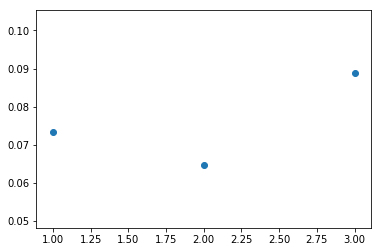

In [14]:
%capture
# We run experiments to analyze the potential advantages of updating the architecture of a Deep Neural Network during
# optimization, and simultaneously using as solution an ensemble of weighted networks (see below).  It is crucial to
# observe that during training we obtain:

# -The optimum parametrization of the network (as in the classical sense).
# -The optimal architecture of the network, which is variable during runtime.
# -A set of "ensemble" weights that minimizes the objective function.

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import trainAndEvaluate
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)

(x_train, y_train), (x_test, y_test) = (
    tf.keras.datasets.boston_housing.load_data())

# @title AdaNet parameters
LEARNING_RATE = 0.001   # @param {type:"number"}
TRAIN_STEPS = 1000      # @param {type:"integer"} 100000
BATCH_SIZE = 32         # @param {type:"integer"}


# Use variable weights that appear in linear combination of subnetworks.
# LEARN_MIXTURE_WEIGHTS # @param {type:"boolean"}

# lambda parameter serves to prevent the optimization from assigning too
# much weight to more complex subnetworks
# ADANET_LAMBDA         # @param {type:"number"}

# Size of adaptive architecture of AdamNet.
# BOOSTING_ITERATIONS = 5  # @param {type:"integer"}

loss_results = []
 
for i in range(1, 4):
    results, _ = trainAndEvaluate.train_and_evaluate(x_train, y_train, x_test, y_test,
                                                     LEARNING_RATE,
                                                     TRAIN_STEPS,
                                                     BATCH_SIZE,
                                                     learn_mixture_weights=False,
                                                     adanet_lambda=0,
                                                     boosting_iterations=i)
    loss_results.append(results["average_loss"]);
    print(loss_results)
    print("Loss:", results["average_loss"])
    print("Architecture:", trainAndEvaluate.ensemble_architecture(results))

%matplotlib inline
plt.scatter(list(range(1, 4)), loss_results)
plt.show()